In [98]:
library(tidytext)
library(janeaustenr)
library(dplyr)
library(stringr)
library(readr)
library(tidyr)

In [87]:
em_lyrics <- read_csv('eminem.csv')

pac_lyrics <-  read_csv('tupac.csv')

# em_lyrics <- em_lyrics %>% mutate_if(is.factor, as.character)
# pac_lyrics <- pac_lyrics %>% mutate_if(is.factor, as.character)

Parsed with column specification:
cols(
  album = col_character(),
  artist = col_character(),
  lyric = col_character(),
  song = col_character(),
  year = col_integer()
)
Parsed with column specification:
cols(
  album = col_character(),
  artist = col_character(),
  lyric = col_character(),
  song = col_character(),
  year = col_integer()
)


In [230]:
tidy_lyrics <- em_lyrics %>%
    group_by(album) %>%
    mutate(linenumber = row_number()) %>%
    ungroup() %>%
    unnest_tokens(word, lyric)

In [160]:
nrcjoy <- get_sentiments("nrc") %>% 
    filter(sentiment=="joy")

In [161]:
tidy_lyrics %>%
    filter(album=="Infinite (1996)") %>%
    inner_join(nrcjoy) %>%
    count(word, sort=T)

Joining, by = "word"


word,n
baby,17
sweet,15
friend,14
feeling,12
good,10
money,8
hope,7
special,7
star,6
laughing,5


In [162]:
em_sentiment <- tidy_lyrics %>%
  inner_join(get_sentiments("bing")) %>%
  count(album, index = linenumber %/% 30, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


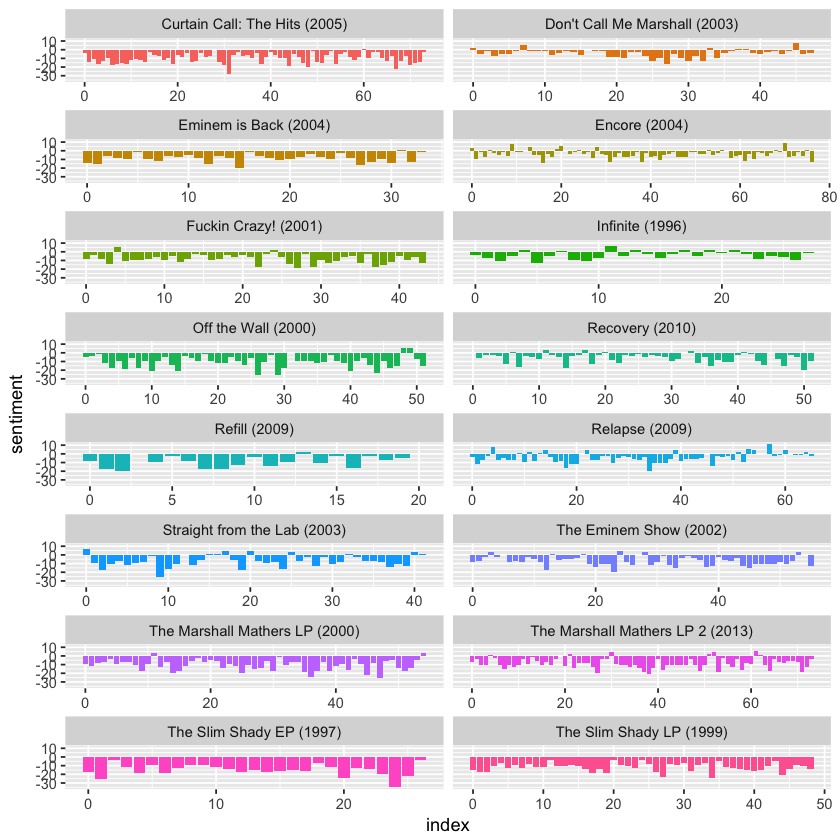

In [163]:
library(ggplot2)

em_data <- em_sentiment[!em_sentiment$album %in% c('Edit'),]

ggplot(em_data, aes(index, sentiment, fill = album)) + 
  geom_col(show.legend = FALSE) +
  facet_wrap(~album, ncol = 2, scales = "free_x")

In [164]:
word_counts <- tidy_lyrics %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

word_counts

Joining, by = "word"


word,sentiment,n
like,positive,2616
shit,negative,1617
fuck,negative,1342
bitch,negative,839
shady,negative,618
right,positive,577
love,positive,489
better,positive,394
bad,negative,368
fucking,negative,313


Selecting by n


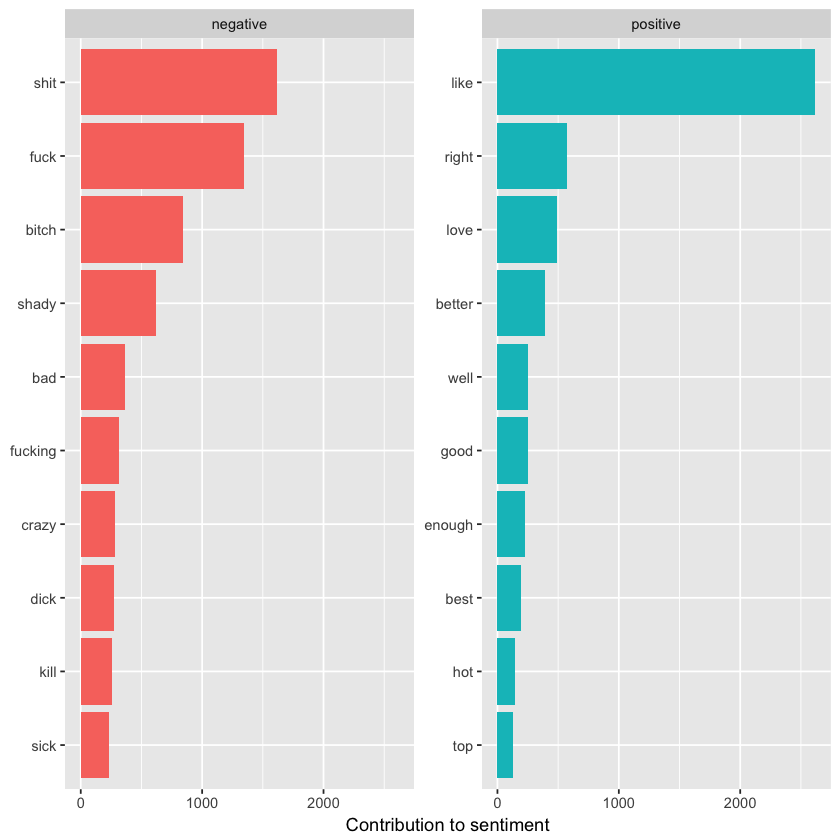

In [165]:
word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [166]:
custom_stop_words <- bind_rows(data_frame(word = c("like"), 
                                          lexicon = c("custom")), 
                               stop_words)

custom_stop_words

word,lexicon
like,custom
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
actually,SMART


Loading required package: RColorBrewer
Joining, by = "word"


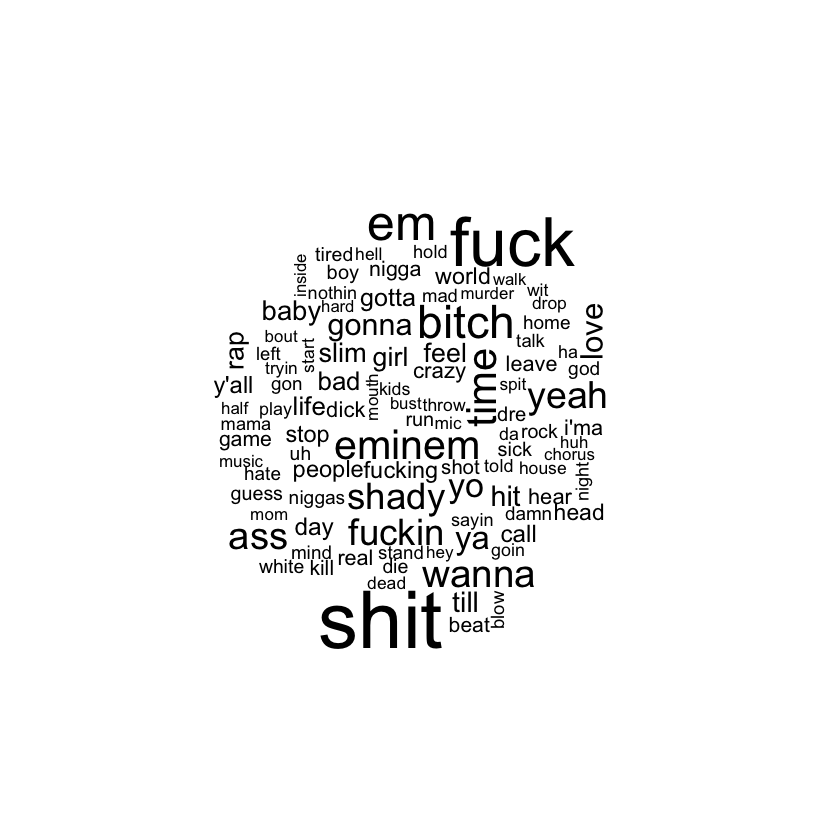

In [145]:
library(wordcloud)

tidy_lyrics %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

Joining, by = "word"


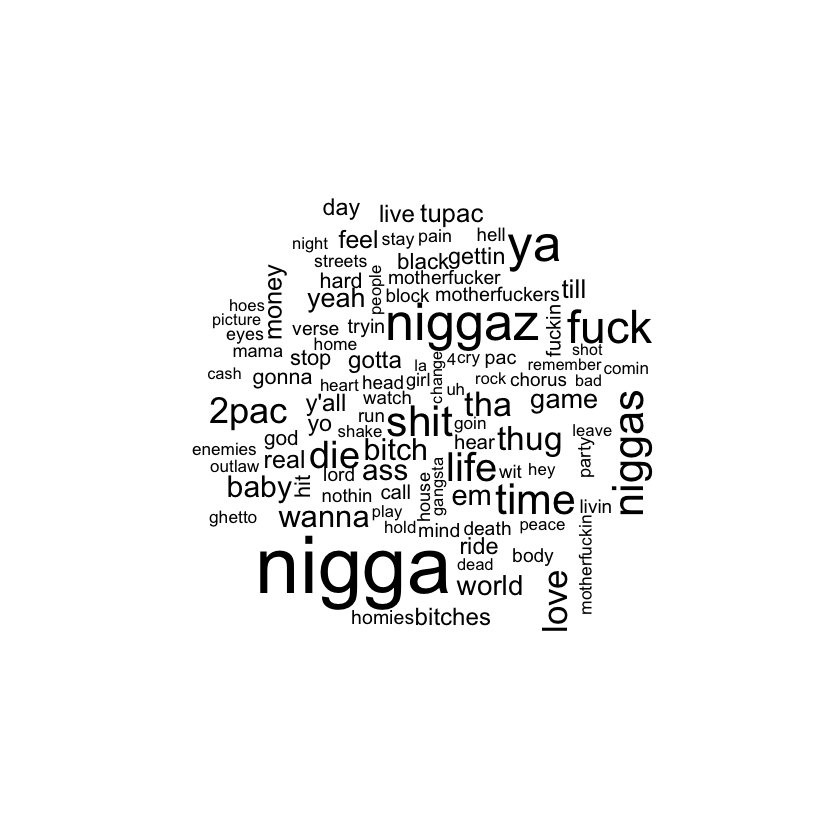

In [154]:
tidy_lyrics %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

Joining, by = "word"


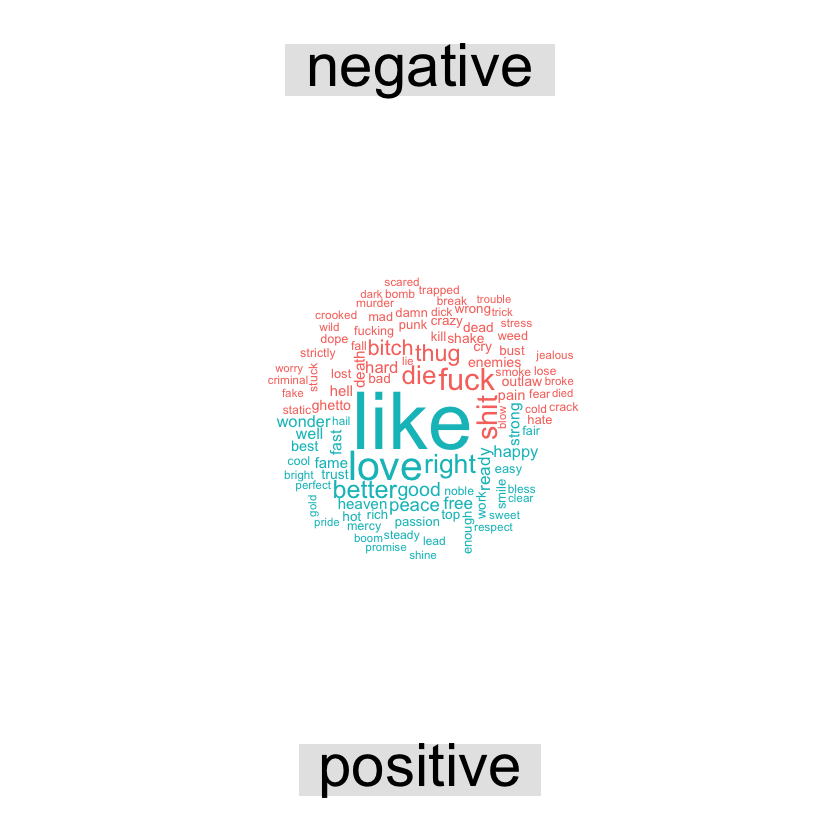

In [158]:
library(reshape2)

tidy_lyrics %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100)

Joining, by = "word"


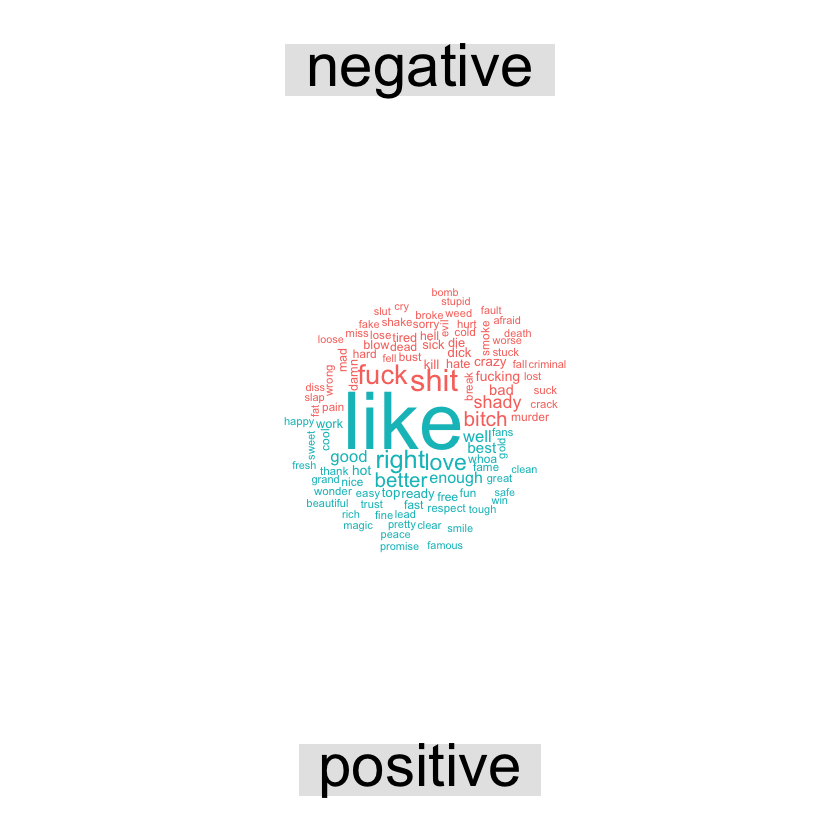

In [167]:
tidy_lyrics %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100)

In [171]:
PandP_sentences <- data_frame(text = em_lyrics$lyric) %>% 
  unnest_tokens(sentence, text, token = "sentences")

In [179]:
album_words <- em_lyrics %>%
  unnest_tokens(word, lyric) %>%
  count(album, word, sort = TRUE) %>%
  ungroup()

In [182]:
total_words <- album_words %>% 
  group_by(album) %>% 
  summarize(total = sum(n))

In [184]:
album_words <- left_join(album_words, total_words)

Joining, by = "album"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2851 rows containing non-finite values (stat_bin).”

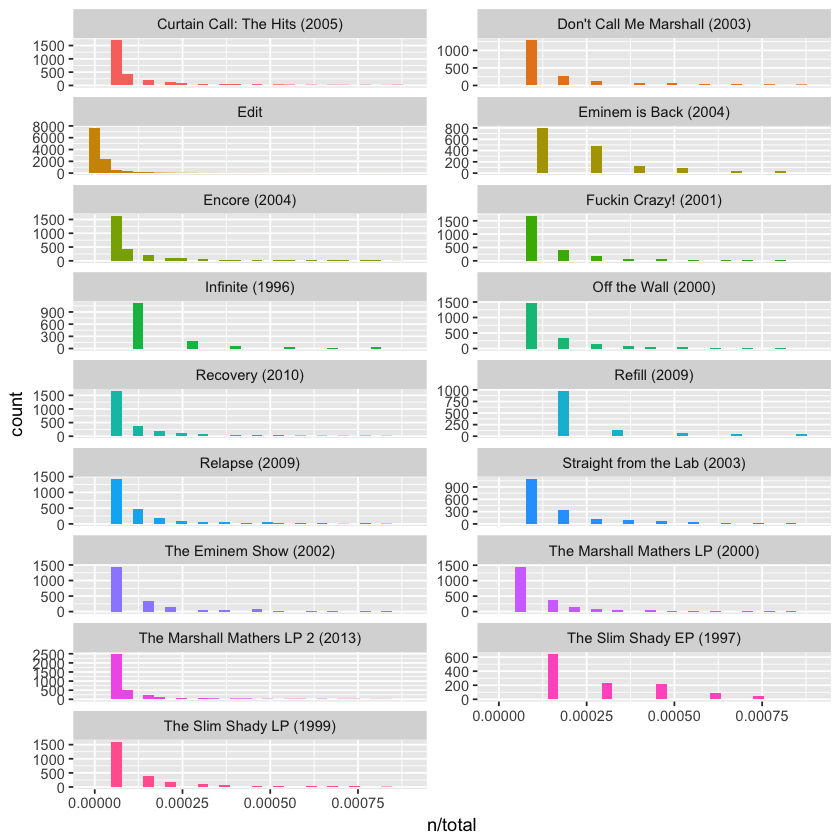

In [186]:
ggplot(album_words, aes(n/total, fill = album)) +
  geom_histogram(show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~album, ncol = 2, scales = "free_y")

In [187]:
freq_by_rank <- album_words %>% 
  group_by(album) %>% 
  mutate(rank = row_number(), 
         `term frequency` = n/total)

freq_by_rank

album,word,n,total,rank,term frequency
Edit,the,5330,160620,1,0.033183912
Edit,i,5107,160620,2,0.031795542
Edit,you,4697,160620,3,0.029242934
Edit,a,4006,160620,4,0.024940854
Edit,and,3727,160620,5,0.023203835
Edit,to,3474,160620,6,0.021628689
Edit,my,2199,160620,7,0.013690699
Edit,me,2170,160620,8,0.013510148
Edit,i'm,2146,160620,9,0.013360727
Edit,it,2049,160620,10,0.012756817


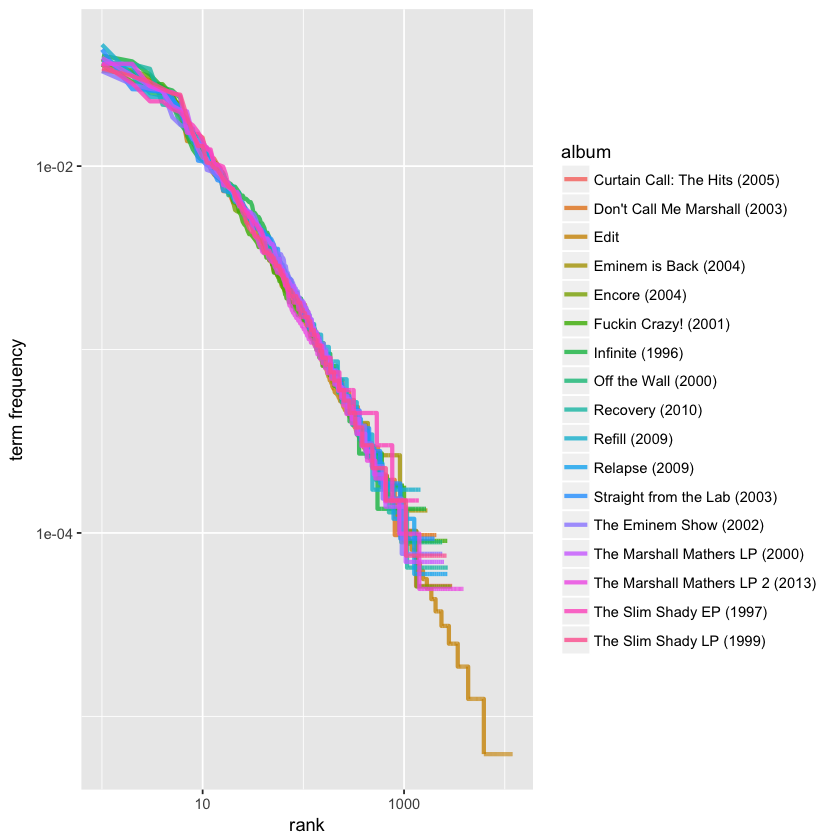

In [189]:
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, color = album)) + 
  geom_line(size = 1.2, alpha = 0.8) + 
  scale_x_log10() +
  scale_y_log10()

In [190]:
rank_subset <- freq_by_rank %>% 
  filter(rank < 500,
         rank > 10)

lm(log10(`term frequency`) ~ log10(rank), data = rank_subset)


Call:
lm(formula = log10(`term frequency`) ~ log10(rank), data = rank_subset)

Coefficients:
(Intercept)  log10(rank)  
    -0.7144      -1.0547  


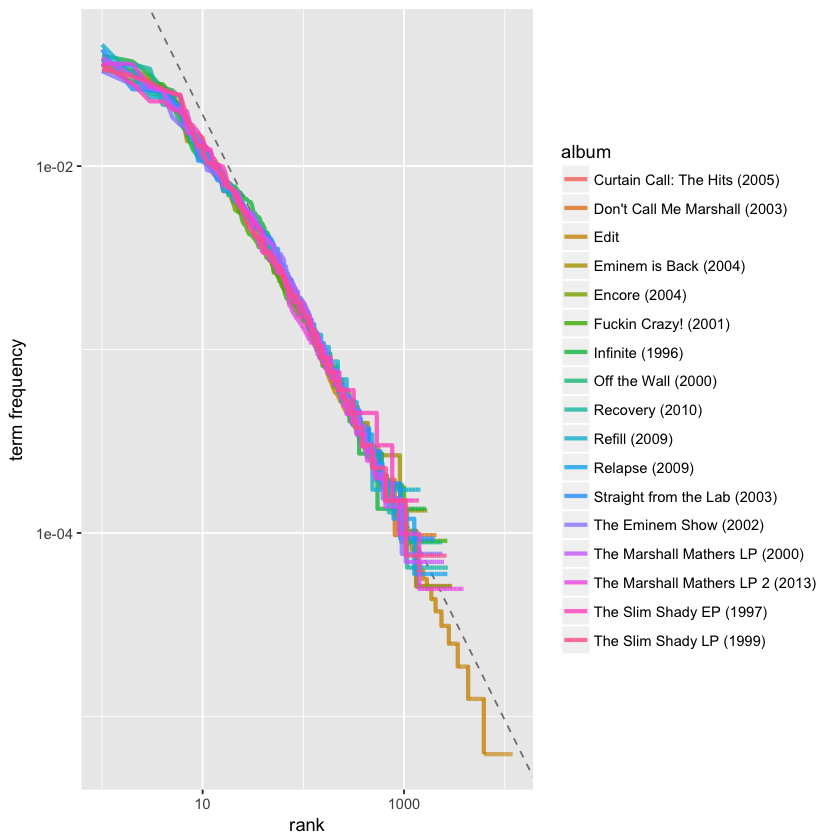

In [192]:
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, color = album)) + 
  geom_abline(intercept = -0.62, slope = -1.1, color = "gray50", linetype = 2) +
  geom_line(size = 1.2, alpha = 0.8) + 
  scale_x_log10() +
  scale_y_log10()

In [194]:
album_words <- album_words %>%
  bind_tf_idf(word, album, n)
album_words

album,word,n,total,tf,idf,tf_idf
Edit,the,5330,160620,0.033183912,0,0
Edit,i,5107,160620,0.031795542,0,0
Edit,you,4697,160620,0.029242934,0,0
Edit,a,4006,160620,0.024940854,0,0
Edit,and,3727,160620,0.023203835,0,0
Edit,to,3474,160620,0.021628689,0,0
Edit,my,2199,160620,0.013690699,0,0
Edit,me,2170,160620,0.013510148,0,0
Edit,i'm,2146,160620,0.013360727,0,0
Edit,it,2049,160620,0.012756817,0,0


In [195]:
album_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

album,word,n,tf,idf,tf_idf
Off the Wall (2000),murda,53,0.004716142,2.1400662,0.010092855
Infinite (1996),maxine,24,0.003249831,2.8332133,0.009207464
Eminem is Back (2004),royce,57,0.007557677,1.0414539,0.007870972
Refill (2009),buffalo,19,0.003270787,1.7346011,0.005673510
Off the Wall (2000),murray,22,0.001957644,2.8332133,0.005546422
Eminem is Back (2004),se,19,0.002519226,2.1400662,0.005391310
Infinite (1996),oughtta,14,0.001895735,2.8332133,0.005371021
Infinite (1996),kyu,12,0.001624915,2.8332133,0.004603732
Refill (2009),kilts,9,0.001549320,2.8332133,0.004389554
Eminem is Back (2004),sa,19,0.002519226,1.7346011,0.004369852


In [224]:
mystopwords <- data_frame(word = c("se", "sa", "kyu", "01", "doh"))
album_words <- anti_join(album_words, mystopwords, by='word')

Selecting by tf_idf


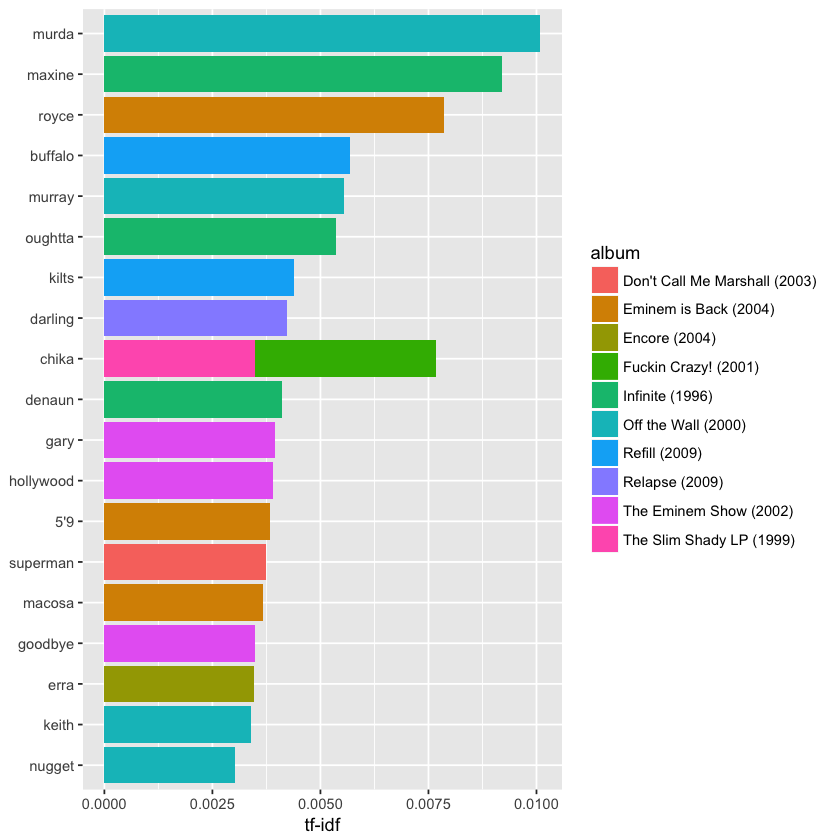

In [225]:
plot_em <- album_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word))))

plot_em %>% 
  top_n(20) %>%
  ggplot(aes(word, tf_idf, fill = album)) +
  geom_col() +
  labs(x = NULL, y = "tf-idf") +
  coord_flip()

Selecting by tf_idf
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'i’m' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'i’m' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'i’m' in 'mbcsToSbcs': dot substituted for <99>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'i’m' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'i’m' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'i’m' in 'mbcsToSbcs': dot substituted for <99>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$

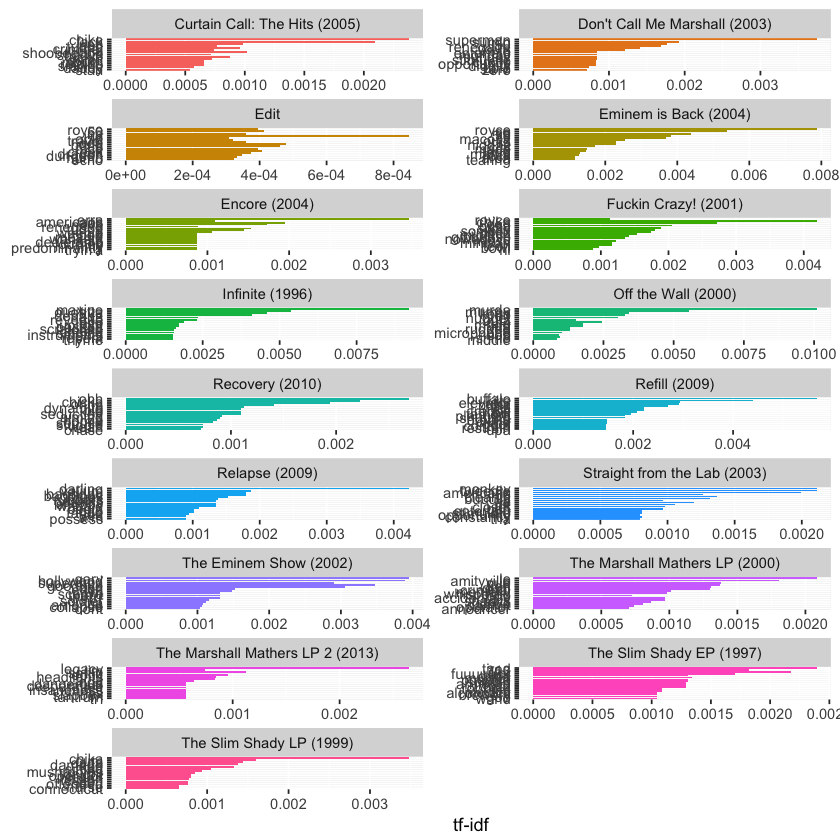

In [200]:
plot_em %>% 
  group_by(album) %>% 
  top_n(15) %>% 
  ungroup %>%
  ggplot(aes(word, tf_idf, fill = album)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~album, ncol = 2, scales = "free") +
  coord_flip()

In [219]:
library(stringr)

tidy_lyrics %>% 
  filter(str_detect(word, "^sa$")) %>% 
  select(word, artist, album, song)

word,artist,album,song
sa,Eminem,Straight from the Lab (2003),Hailie's Revenge
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa
sa,Eminem,Eminem is Back (2004),Macosa


In [233]:
em_bigrams <- em_lyrics %>%
  unnest_tokens(bigram, lyric, token = "ngrams", n = 2)

In [235]:
em_bigrams %>%
  count(bigram, sort = TRUE)

bigram,n
in the,1351
i don't,777
on the,684
to the,564
and i,552
with a,517
like a,514
i got,485
in a,480
i just,476


In [236]:
library(tidyr)

bigrams_separated <- em_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)

# new bigram counts:
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)

bigram_counts

word1,word2,n
slim,shady,275
ha,ha,103
dr,dre,78
50,cent,71
hip,hop,70
chika,slim,65
chika,chika,64
sayin,goodbye,64
yeah,yeah,61
rap,game,60


In [237]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")

bigrams_united

album,artist,song,year,bigram
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,mouth yo
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,yo yo
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,snare picket
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,picket signs
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,wicked rhymes
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,commotion emotions
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,emotions run
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,run deep
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,oceans explodin
Curtain Call: The Hits (2005),Eminem,Cleanin' Out My Closet,2005,explodin tempers


In [242]:
em_lyrics %>%
  unnest_tokens(trigram, lyric, token = "ngrams", n = 4) %>%
  separate(trigram, c("word1", "word2", "word3", "word4"), sep = " ") %>%
  filter(!word1 %in% stop_words$word,
         !word2 %in% stop_words$word,
         !word3 %in% stop_words$word,
         !word4 %in% stop_words$word) %>%
  count(word1, word2, word3, word4, sort = TRUE)

word1,word2,word3,word4,n
chika,chika,slim,shady,64
na,na,na,na,37
ha,ha,ha,ha,32
hard,rhyme,keith,murray,22
real,hard,rhyme,keith,22
la,la,la,la,19
mama,se,mama,sa,18
girl,girl,girl,girl,17
yo,left,yo,left,16
da,da,da,da,15


In [246]:
library('igraph')

In [247]:
bigram_counts

word1,word2,n
slim,shady,275
ha,ha,103
dr,dre,78
50,cent,71
hip,hop,70
chika,slim,65
chika,chika,64
sayin,goodbye,64
yeah,yeah,61
rap,game,60


In [248]:
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()

bigram_graph

IGRAPH e1a89c0 DN-- 92 69 -- 
+ attr: name (v/c), n (e/n)
+ edges from e1a89c0 (vertex names):
 [1] slim  ->shady   ha    ->ha      dr    ->dre     50    ->cent   
 [5] hip   ->hop     chika ->slim    chika ->chika   sayin ->goodbye
 [9] yeah  ->yeah    rap   ->game    da    ->da      8     ->mile   
[13] murder->murder  na    ->na      royce ->da      shot  ->hit    
[17] la    ->la      uh    ->huh     obie  ->trice   da    ->5'9    
[21] girl  ->girl    shady ->records ah    ->ah      wanna ->fuck   
[25] sleep ->bitch   bye   ->bye     uh    ->uh      yo    ->yo     
[29] girl  ->shake   mile  ->road    murda ->murda   chicka->chicka 
+ ... omitted several edges

In [251]:
install.packages('ggraph')

also installing the dependencies ‘udunits2’, ‘tweenr’, ‘units’, ‘viridisLite’, ‘gridExtra’, ‘ggforce’, ‘ggrepel’, ‘viridis’




The downloaded binary packages are in
	/var/folders/yc/9rj9ns6s3jn1trw64sfwzg6w0000gt/T//RtmpCgNH0S/downloaded_packages


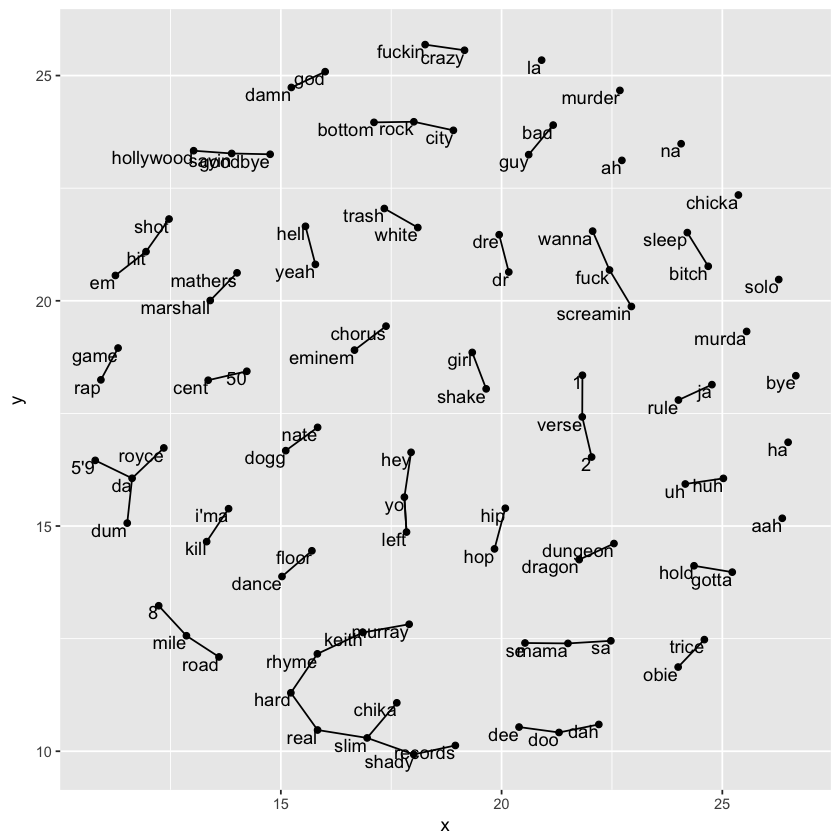

In [252]:
library(ggraph)
set.seed(2017)

ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)

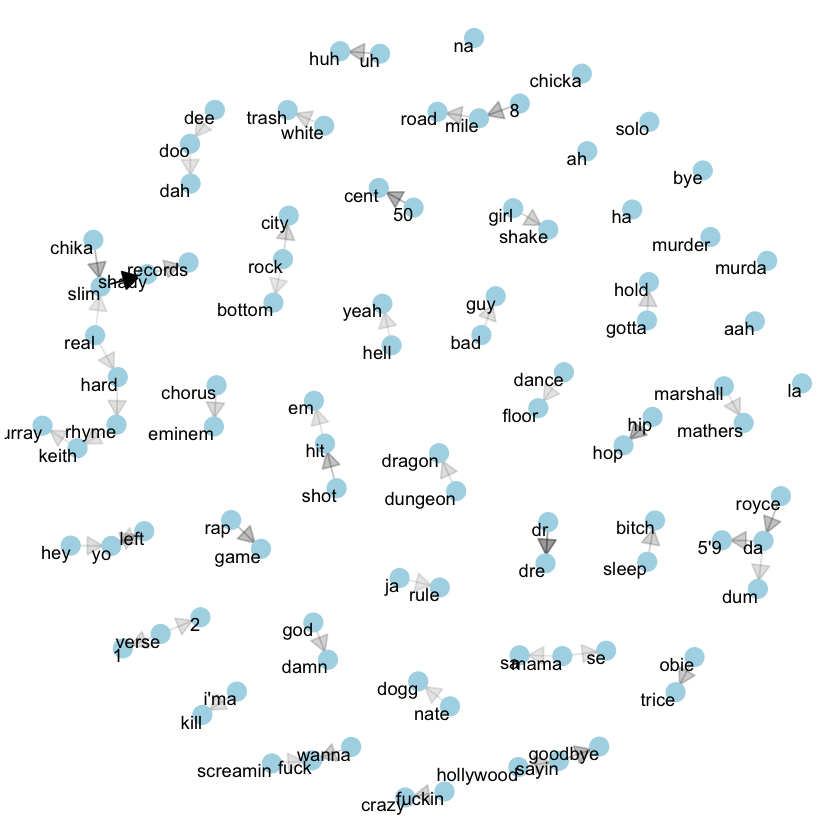

In [253]:
set.seed(2016)

a <- grid::arrow(type = "closed", length = unit(.15, "inches"))

ggraph(bigram_graph, layout = "fr") +
  geom_edge_link(aes(edge_alpha = n), show.legend = FALSE,
                 arrow = a, end_cap = circle(.07, 'inches')) +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
  theme_void()

In [255]:
em_section_words <- em_lyrics %>%
  filter(album == "Infinite (1996)") %>%
  mutate(section = row_number() %/% 10) %>%
  filter(section > 0) %>%
  unnest_tokens(word, lyric) %>%
  filter(!word %in% stop_words$word)

em_section_words

album,artist,song,year,section,word
Infinite (1996),Eminem,Open Mic,1996,1,fresh
Infinite (1996),Eminem,Open Mic,1996,1,fresh
Infinite (1996),Eminem,It's OK,1996,1,till
Infinite (1996),Eminem,It's OK,1996,1,glad
Infinite (1996),Eminem,It's OK,1996,1,buried
Infinite (1996),Eminem,It's OK,1996,1,verse
Infinite (1996),Eminem,It's OK,1996,1,1
Infinite (1996),Eminem,It's OK,1996,1,eminem
Infinite (1996),Eminem,Open Mic,1996,1,ayo
Infinite (1996),Eminem,Open Mic,1996,1,fuck


In [258]:
install.packages('widyr')


The downloaded binary packages are in
	/var/folders/yc/9rj9ns6s3jn1trw64sfwzg6w0000gt/T//RtmpCgNH0S/downloaded_packages


In [260]:
library(widyr)

# count words co-occuring within sections
word_pairs <- em_section_words %>%
  pairwise_count(word, section, sort = TRUE)

word_pairs

item1,item2,n
mic,fuck,14
fuck,mic,14
sweet,mc,14
mc,sweet,14
passed,fuck,13
flow,fuck,13
fuck,passed,13
mic,passed,13
flow,passed,13
passed,mic,13


In [265]:
word_pairs %>%
  filter(item1 == "eminem")

item1,item2,n
eminem,wanna,9
eminem,verse,8
eminem,fuck,6
eminem,mc,6
eminem,sweet,6
eminem,maxine,5
eminem,1,4
eminem,mic,4
eminem,shit,4
eminem,yeah,4
